<a href="https://colab.research.google.com/github/yananma/5_programs_per_day/blob/master/04251.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 3.2 线性回归的从零开始实现

In [0]:
%matplotlib inline 
import torch 
from IPython import display 
from matplotlib import pyplot as plt
import numpy as np 
import random

### 3.2.1 生成数据集

In [0]:
num_inputs = 2 
num_examples = 1000 
true_w = [2, -3.4]
true_b = 4.2 
features = torch.randn(num_examples, num_inputs, dtype=torch.float32)
labels = true_w[0] * features[:, 0] + true_w[1] * features[:, 1] + true_b 
labels += torch.tensor(np.random.normal(0, 0.01, size=labels.size()), dtype=torch.float32)

In [6]:
features[0], labels[0]

(tensor([ 1.8512, -0.0988]), tensor(8.2541))

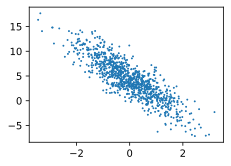

In [7]:
def use_svg_display():
    display.set_matplotlib_formats('svg')

def set_figsize(figsize=(3.5, 2.5)):
    use_svg_display()
    plt.rcParams['figure.figsize'] = figsize 

set_figsize()
plt.scatter(features[:, 1].numpy(), labels.numpy(), 1);

In [0]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        j = torch.LongTensor(indices[i: min(i + batch_size, num_examples)])
        yield features.index_select(0, j), labels.index_select(0, j)

In [9]:
batch_size = 10 

for X, y in data_iter(batch_size, features, labels):
    print(X,'\n', y)
    break 

tensor([[-1.1549, -0.3216],
        [ 1.4775, -0.5995],
        [-0.2159, -0.6552],
        [ 1.3455, -1.9270],
        [-0.1800, -1.4100],
        [ 0.0032,  1.2414],
        [ 0.8395,  1.4860],
        [ 0.5496, -0.4935],
        [-0.7700,  2.8618],
        [-1.2057, -0.4103]]) 
 tensor([ 2.9687e+00,  9.2118e+00,  5.9852e+00,  1.3448e+01,  8.6585e+00,
        -4.9564e-03,  8.1240e-01,  6.9794e+00, -7.0682e+00,  3.1904e+00])


### 3.2.3 初始化模型参数

In [0]:
w = torch.tensor(np.random.normal(0, 0.01, (num_inputs, 1)), dtype=torch.float32)
b = torch.zeros(1, dtype=torch.float32)

In [11]:
w.requires_grad_(requires_grad=True)
b.requires_grad_(requires_grad=True)

tensor([0.], requires_grad=True)

### 3.2.4 定义模型

In [0]:
def linreg(X, w, b):
    return torch.mm(X, w) + b 

### 3.2.5 定义损失函数

In [0]:
def squared_loss(y_hat, y):
    return (y_hat - y.view(y_hat.size())) ** 2 / 2

### 3.2.6 定义优化算法

In [0]:
def sgd(params, lr, batch_size):
    for param in params:
        param.data -= lr * param.grad / batch_size 

In [15]:
lr = 0.03 
num_epochs = 3 
net = linreg 
loss = squared_loss 

loss_ls = []
for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y).sum()
        l.backward()
        sgd([w, b], lr, batch_size)

        w.grad.data.zero_()
        b.grad.data.zero_()
        loss_ls.append(l.float().mean().item())
    train_l = loss(net(features, w, b), labels)
    print('epoch %d, loss %f' % (epoch + 1, train_l.mean().item()))

epoch 1, loss 0.029689
epoch 2, loss 0.000106
epoch 3, loss 0.000054


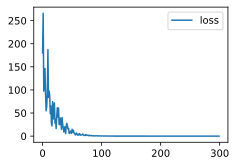

In [16]:
plt.plot(loss_ls, label='loss')
plt.legend()
plt.show()

In [17]:
print(true_w, '\n', w)

[2, -3.4] 
 tensor([[ 2.0000],
        [-3.3994]], requires_grad=True)


In [19]:
print(true_b, '\n', b)

4.2 
 tensor([4.1996], requires_grad=True)
